### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('coupons.csv')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [13]:
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3. Decide what to do about your missing data -- drop, replace, other...

In [17]:
data.dropna()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1240,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,0
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
8294,Work,Alone,Rainy,55,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
8295,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
8296,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1


In [18]:
datana = data.dropna()
datana.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           108 non-null    object
 1   passanger             108 non-null    object
 2   weather               108 non-null    object
 3   temperature           108 non-null    int64 
 4   time                  108 non-null    object
 5   coupon                108 non-null    object
 6   expiration            108 non-null    object
 7   gender                108 non-null    object
 8   age                   108 non-null    object
 9   maritalStatus         108 non-null    object
 10  has_children          108 non-null    int64 
 11  education             108 non-null    object
 12  occupation            108 non-null    object
 13  income                108 non-null    object
 14  car                   108 non-null    object
 15  Bar                   108 non-null    obj

4. What proportion of the total observations chose to accept the coupon?



In [32]:
proportion_data_retained = round(len(datana)/len(data) * 100, 2)
print(f'Propotion of data retained if drop null: {proportion_data_retained}%')
proportion_accepted_withnull = round(len(data[data['Y'] == 1])/len(data) * 100, 2)
proportion_accepted_withoutnull = round(len(datana[datana['Y'] == 1])/len(datana) * 100, 2)
print(f'proportion of coupons accepted with nulls: {proportion_accepted_withnull}% and without: {proportion_accepted_withoutnull}%')

Propotion of data retained if drop null: 0.85%
proportion of coupons accepted with nulls: 56.84% and without: 57.41%


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Coupon')

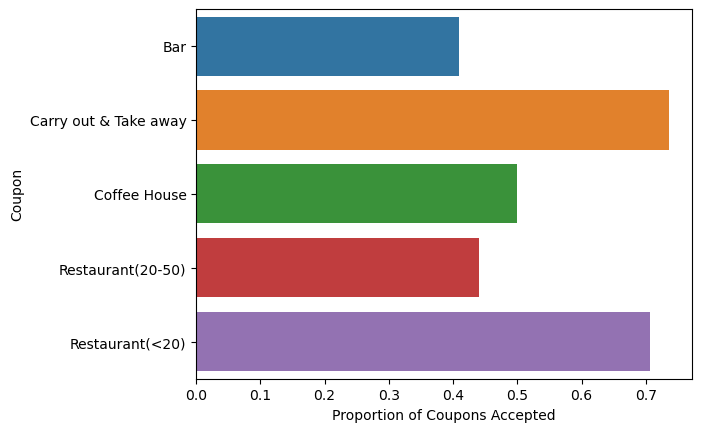

In [33]:
sns.barplot(data, x='Y', y='coupon', order=np.sort(data['coupon'].unique()), errorbar=None)
plt.xlabel('Proportion of Coupons Accepted')
plt.ylabel('Coupon')

6. Use a histogram to visualize the temperature column.

([<matplotlib.axis.XTick at 0x769b7093e4d0>,
 [Text(30, 0, '30'), Text(55, 0, '55'), Text(80, 0, '80')])

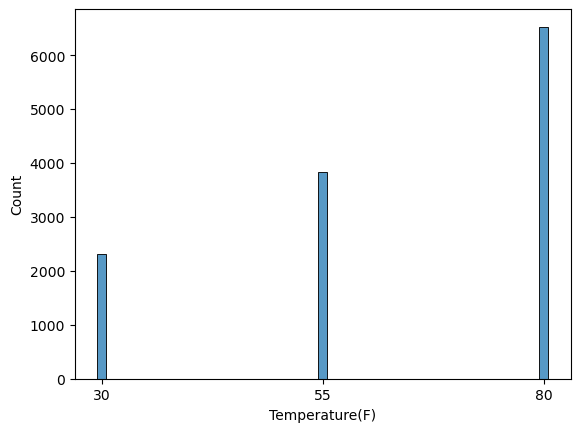

In [35]:
ax = sns.histplot(data=data, x='temperature', stat='count', bins=3, discrete=True)
plt.xlabel("Temperature(F)")
plt.xticks(ticks=[30,55,80]) 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [70]:
DataFrame = data.query('coupon == "Bar"')

DataFrame.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11214,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,below21,Unmarried partner,...,never,1~3,less1,never,1,1,0,0,1,0
4665,No Urgent Place,Partner,Sunny,80,6PM,Bar,2h,Female,below21,Unmarried partner,...,1~3,1~3,4~8,1~3,1,1,0,0,1,0
7538,No Urgent Place,Partner,Sunny,30,10AM,Bar,1d,Female,36,Single,...,less1,gt8,4~8,less1,1,1,0,0,1,0
778,Home,Alone,Sunny,55,6PM,Bar,1d,Female,26,Single,...,1~3,1~3,gt8,1~3,1,0,0,1,0,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


Proportion of bar coupons accepted: 0.41


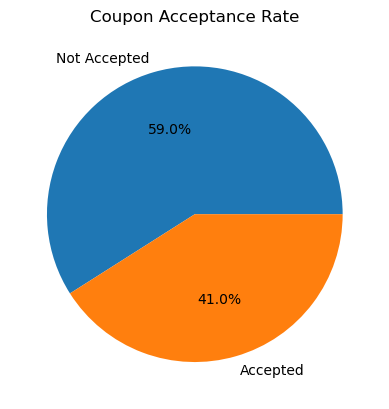

In [75]:
DataFrame_count = len(DataFrame)
DataFrame_accepted = len(DataFrame.query('Y == 1'))
DataFrame_accepted_ratio = DataFrame_accepted / DataFrame_count 

print(f'Proportion of bar coupons accepted: {round(DataFrame_accepted_ratio, 2)}')

acceptance_counts = [DataFrame_count - DataFrame_accepted, DataFrame_accepted]
labels = ["Not Accepted", "Accepted"]

plt.pie(acceptance_counts, labels=labels, autopct="%1.1f%%")
plt.title("Coupon Acceptance Rate")
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [77]:
DataFrame['Bar'].value_counts()

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
import pandas as pd 
data = pd.read_csv('coupons.csv')
DataFrame = data.query('coupon == "Bar"')
DataFrame25['age'] = pd.to_numeric(DataFrame25['age'], errors='coerce')  
DataFrame25 = DataFrame25[DataFrame25['age'] >= 25] 
DataFrame25 = DataFrame.sort_values(by = ['age', 'Y'],ascending=[True, False])


less_than_once = DataFrame25.query('Bar in ["never", "less1"]')
more_than_once = DataFrame25.query('Bar in ["1~3", "4~8", "gt8"]')

less_than_once_total = len(less_than_once)
more_than_once_total = len(more_than_once)

less_than_once_accepted = len(less_than_once.query('Y == 1'))
more_than_once_accepted = len(more_than_once.query('Y == 1'))

print(f'Acceptance rate between drivers >25 at the bar more than once: {round(more_than_once_accepted / more_than_once_total, 2)} ({more_than_once_accepted / more_than_once_total})')
print(f'Acceptance rate between drivers >25 at the bar less than once: {round(less_than_once_accepted / less_than_once_total, 2)} ({less_than_once_accepted / less_than_once_total})')

Acceptance rate between drivers >25 at the bar more than once: 0.69 (0.6879194630872483)
Acceptance rate between drivers >25 at the bar less than once: 0.29 (0.29214285714285715)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [19]:
print(DataFrame['passanger'].value_counts())
DataFrame['occupation'].value_counts()

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64


occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [26]:
focus_group = 'Bar in ["1~3", "4~8", "gt8"] and passanger in ["Friends(s)", "Partner"] and occupation != "Farming Fishing & Forestry"'
not_focus_group = f'not {(focus_group)}'
DataBar_a = DataFrame.query(focus_group)
DataBar_b = DataFrame.query(not_focus_group)

Bar_a = len(DataBar_a.query('Y == 1'))
Bar_b = len(DataBar_b.query('Y == 1'))

print(f'Acceptance rate for those in the focus group: {round(Bar_a/len(DataBar_a), 2)} ({Bar_a}/{len(DataBar_a)})')
print(f'Acceptance rate for those not in the focus group: {round(Bar_b/len(DataBar_b), 2)} ({Bar_b}/{len(DataBar_b)})')  

Acceptance rate for those in the focus group: 0.6 (45/75)
Acceptance rate for those not in the focus group: 0.31 (62/199)


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [28]:
DataFrame['income'].value_counts()

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

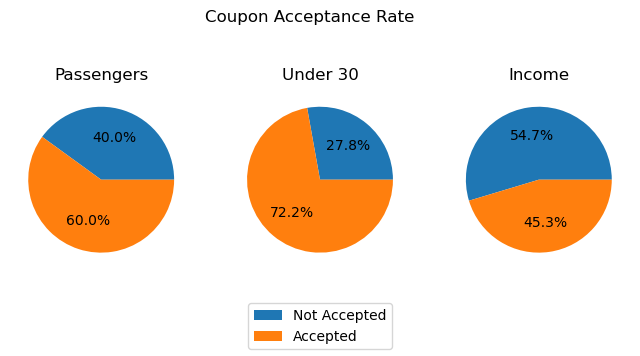

In [45]:
import matplotlib.pyplot as plt

if DataFrame['age'].dtype == 'object':  
    DataFrame['age'] = DataFrame['age'].str.replace('below21', '21')
    DataFrame['age'] = DataFrame['age'].str.replace('50plus', '50')
    DataFrame['age'] = DataFrame['age'].astype(int)
else:
    
    pass

DataBar_a = DataFrame.query('Bar in ["1~3", "4~8", "gt8"] and passanger in ["Friends(s)", "Partner"] and maritalStatus != "Widowed"')
DataBar_b = DataFrame.query('Bar in ["1~3", "4~8", "gt8"] and age < 30')
DataBar_c = DataFrame.query('RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3.5))
pie1 = axes[0].pie(DataBar_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(DataBar_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie3 = axes[2].pie(DataBar_c.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Passengers")
axes[1].set_title(label="Under 30")
axes[2].set_title(label="Income")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [46]:
print(f'Acceptance rates of coupons, based on these observations, largely depends on the stage of life of the customers. Those under 30 who visit multiple times are established by themselves and do not accept as many coupons. Those with communities or partners or the elderly accept coupons more and those who eat out regularly with low income rely on coupons the most.')

Acceptance rates of coupons, based on these observations, largely depends on the stage of life of the customers. Those under 30 who visit multiple times are established by themselves and do not accept as many coupons. Those with communities or partners or the elderly accept coupons more and those who eat out regularly with low income rely on coupons the most.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [70]:
Restuarant2050 = data.query('coupon == "Bar"')
print(f'Records for Restaurant $20-$50 coupon: {len(Restuarant2050)}')

Records for Restaurant $20-$50 coupon: 2017


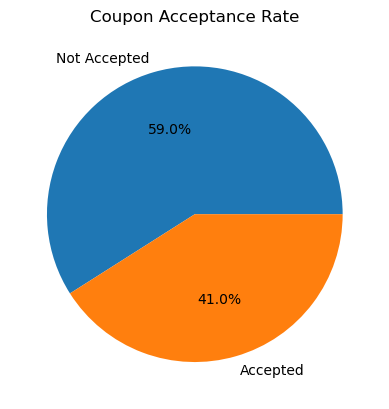

In [72]:
import seaborn as sns
plt.pie(Restuarant2050.groupby('Y')['Y'].count(), labels=("Not Accepted", "Accepted"), autopct="%1.1f%%")
sns.set_palette('Paired')
plt.title("Coupon Acceptance Rate")
plt.show()

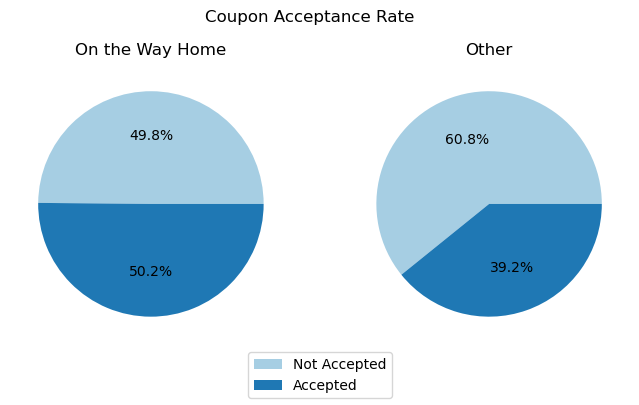

In [75]:
Restuarant2050_a = Restuarant2050.query('direction_same == 1 and destination == "Home"')
Restuarant2050_b = Restuarant2050.query('not (direction_same == 1 and destination == "Home")')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(Restuarant2050_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(Restuarant2050_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="On the Way Home")
axes[1].set_title(label="Other")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
sns.set_palette('Paired')
plt.show()

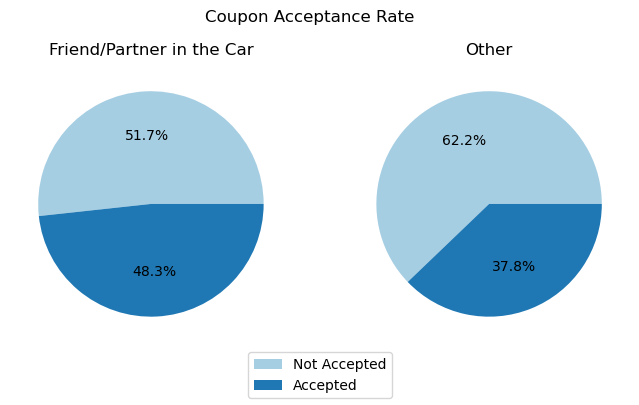

In [77]:
query_a = 'passanger in ["Friend(s)", "Partner"]'
Restuarant2050_a = Restuarant2050.query(query_a)
Restuarant2050_b = Restuarant2050.query(f'not ({query_a})')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(Restuarant2050_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(Restuarant2050_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Friend/Partner in the Car")
axes[1].set_title(label="Other")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
sns.set_palette('Paired')
plt.show()

Text(0.5, 1.0, 'Coupons Accepted by Passenger')

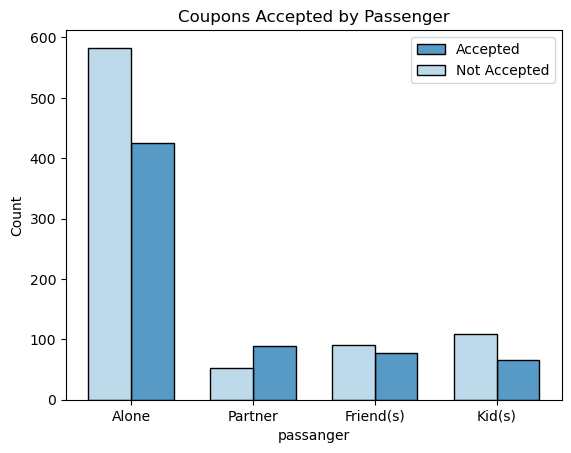

In [79]:
Restuarant2050 = data.query('coupon == "Restaurant(20-50)"')


ax = sns.histplot(data=Restuarant2050, x='passanger', hue='Y', multiple='dodge', shrink=0.7)
ax.legend(labels=('Accepted','Not Accepted'))
ax.set_title('Coupons Accepted by Passenger')